# **Data Visualization Assignment**
### **Data Analytics Course - Implementation Notebook**

## 📌 **Objective**
This notebook implements various **data visualization techniques** to analyze three given datasets:
- **bar_assignment.csv** (for a horizontal stacked bar chart)
- **sankey_assignment.csv** (for a Sankey diagram)
- **networks_assignment.csv** (for a network graph)

The primary objective is to accurately represent the data using prescribed visualization formats while maintaining clarity and consistency in design.

## 🔹 **Workflow Overview**
1. **Load the datasets** and preprocess the data.
2. **Generate visualizations** following given specifications:
   - **Bar Chart:** Transform `1` into "Yes" and `0` into "No" and create a horizontal stacked bar chart.
   - **Sankey Diagram:** Connect specified categories and follow given path specifications.
   - **Network Graph:** Construct a graph with a pentagram structure for key nodes and appropriate color coding for other nodes.
3. **Collate all visualizations** into a single composite image suitable for printing.

The implementation will ensure that the same font and font size are maintained across all visualizations for consistency.

---

## Bar Graph Analysis

### Introduction
This section focuses on creating a **horizontal stacked bar chart** using the given dataset. We will:
- Convert `1` into "Yes" and `0` into "No".
- Group the data by labels and count occurrences of "Yes" and "No".
- Visualize the results following the specified format and color scheme.

---



## Step 1: Load the Dataset
### 📌 **Loading the Dataset**
The first step in this process is to read the dataset into a pandas DataFrame.
We will check the structure of the dataset to understand how the values are represented.


In [31]:
import pandas as pd
import os

# Check current working directory
print("Current Working Directory:", os.getcwd())

# List files in the directory to verify presence of 'bar_assignment.csv'
print("Files in Directory:", os.listdir())

# Load the dataset
file_path = "bar_assignment.csv"
df = None  # Define df beforehand to avoid NameError

# Try loading the file
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
    print(df.head())  # Display first few rows
except FileNotFoundError:
    print("Error: File not found. Check the file path and ensure it's in the correct directory.")

# Check if df is successfully loaded
if df is None:
    print("DataFrame is not loaded. Please check the file path.")


Current Working Directory: c:\Users\subar\OneDrive\Desktop\Assignment_2\DataAnalytics_Activities\Assignment_2
Files in Directory: ['assignment_2.ipynb', 'bar_assignment.csv', 'bar_graph.png', 'collated_graphs.png', 'networks_assignment.csv', 'network_graph.png', 'sankey_assignment.csv', 'sankey_diagram.png']
File loaded successfully!
  LABEL  COUNT
0     D      1
1     D      1
2     D      0
3     D      1
4     F      1


## Step 2: Transform Data
### 📌 **Processing and Transforming Data**
In this step, we convert the numerical values `1` into "Yes" and `0` into "No".
We will then group the data by labels to count occurrences of each category.


In [32]:
# Convert 1 to 'Yes' and 0 to 'No'
df['Response'] = df['COUNT'].map({1: 'Yes', 0: 'No'})

# Count occurrences of Yes and No per label
bar_summary = df.groupby("LABEL")['Response'].value_counts().unstack().fillna(0)

# Display transformed data
bar_summary


Response,No,Yes
LABEL,,
D,1.0,3.0
F,2.0,2.0
I,0.0,1.0
N,1.0,2.0
S,5.0,5.0


## Step 3: Generate Horizontal Stacked Bar Chart
### 📌 **Creating the Bar Chart**
Now, we will generate a **horizontal stacked bar chart** using Matplotlib. 


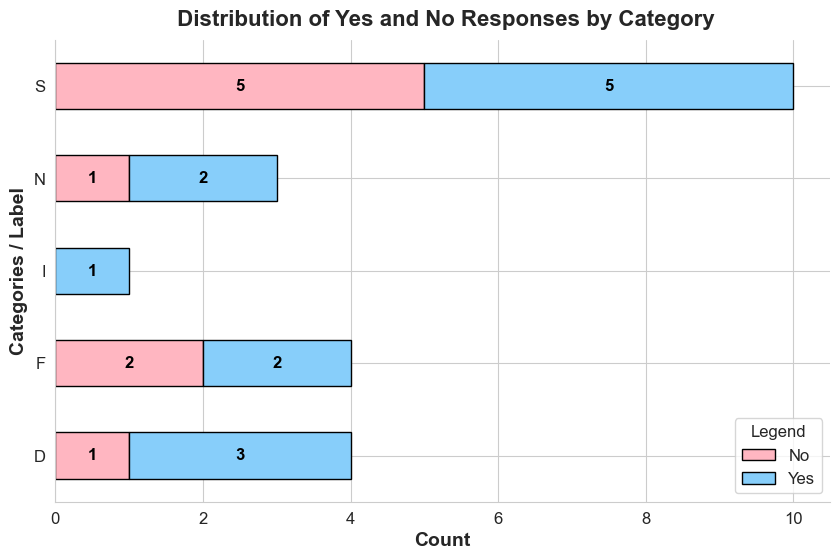

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "bar_assignment.csv"
df = pd.read_csv(file_path)

# Convert 1 to 'Yes' and 0 to 'No'
df['Response'] = df['COUNT'].map({1: 'Yes', 0: 'No'})

# Count occurrences of Yes and No per label
bar_summary = df.groupby("LABEL")['Response'].value_counts().unstack().fillna(0)

# **Ensure "I" is kept in the dataset**
bar_summary = bar_summary.reindex(sorted(df["LABEL"].unique()), fill_value=0)

# Improved color palette (pastel shades)
colors = {"No": "#FFB6C1", "Yes": "#87CEFA"}  # Light Pink & Light Blue

# Set up figure aesthetics
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))
bar_summary.plot(kind="barh", stacked=True, color=[colors["No"], colors["Yes"]], ax=ax, edgecolor='black')

# Customize axis labels & title
ax.set_xlabel("Count", fontsize=14, fontweight="bold")
ax.set_ylabel("Categories / Label", fontsize=14, fontweight="bold")  
ax.set_title(" Distribution of Yes and No Responses by Category", fontsize=16, fontweight="bold", pad=10)

# Move legend to bottom right
ax.legend(["No", "Yes"], title="Legend", loc="lower right", fontsize=12, frameon=True, fancybox=True)

# **Fix: Remove unnecessary letters beside bars but keep value annotations**
for i, (no, yes) in enumerate(zip(bar_summary["No"], bar_summary["Yes"])):
    if no > 0:
        ax.text(no / 2, i, str(int(no)), va="center", ha="center", color="black", fontsize=12, fontweight="bold")
    if yes > 0:
        ax.text(no + yes / 2, i, str(int(yes)), va="center", ha="center", color="black", fontsize=12, fontweight="bold")

# Remove unnecessary borders
sns.despine()
# Save the bar chart image
bar_graph_path = "bar_graph.png"
plt.savefig(bar_graph_path, dpi=300, bbox_inches="tight")
# Show plot
plt.show()
plt.close()



## **📊 Distribution of Yes and No Responses by Category**

### 🔹 **Overview**
This stacked bar chart visually represents the **distribution of "Yes" and "No" responses** across different categories. Each category (D, F, I, N, S) has responses classified based on:
- **1 → "Yes"** (indicating presence/affirmative response)
- **0 → "No"** (indicating absence/negative response)

### 🔥 **Key Observations**
- **Category S** has the highest number of responses, with a balanced distribution of **"Yes" and "No"**.
- **Category I** has only **"Yes"** responses, meaning there were no recorded "No" values.
- **Category N** has more **"Yes" responses** than "No".
- **Category D** has a higher **"Yes"** count compared to "No".
- **Category F** has an **even** number of "Yes" and "No" responses.



---

# 📌 B. Sankey Diagram  

## 🚀 Overview  
    - The **Sankey diagram** visualizes the **flow distribution** between various categories.  
    - It illustrates how elements from the **source categories** (*PS, OMP, CNP, NRP, NMCCC, PEC, NCDM, RGS*)  
    - transition through **middle categories** (*D, F, I, N, S*)  
    - and reach their respective **end categories** (*Reg, Aca, Oth*).  


<h1 style="font-size: 28px; color: #4DB6AC;">📌 Step 1: Load the Sankey Dataset</h1>

<h2 style="font-size: 24px; color: #FF7043;">🔹 Loading the Dataset</h2>

<p>The first step in this process is to read the dataset into a pandas DataFrame.<br>
We will check the structure of the dataset to understand how the values are represented.</p>



In [34]:
import pandas as pd
import os

# Check current working directory
print("Current Working Directory:", os.getcwd())

# List files in the directory to verify presence of 'sankey_assignment.csv'
print("Files in Directory:", os.listdir())

# Load the dataset
file_path = "sankey_assignment.csv"
df_sankey = None  # Define df beforehand to avoid NameError

# Try loading the file
try:
    df_sankey = pd.read_csv(file_path)
    print("File loaded successfully!")
    display(df_sankey.head(6))  # Display first six rows
except FileNotFoundError:
    print("Error: File not found. Check the file path and ensure it's in the correct directory.")

# Check if df is successfully loaded
if df_sankey is None:
    print("DataFrame is not loaded. Please check the file path.")


Current Working Directory: c:\Users\subar\OneDrive\Desktop\Assignment_2\DataAnalytics_Activities\Assignment_2
Files in Directory: ['assignment_2.ipynb', 'bar_assignment.csv', 'bar_graph.png', 'collated_graphs.png', 'networks_assignment.csv', 'network_graph.png', 'sankey_assignment.csv', 'sankey_diagram.png']
File loaded successfully!


,LABEL,PS,OMP,CNP,NRP,NMCCC,PEC,NCDM,RGS,Reg,Aca,Oth
0,S,3,4,1,1,0,0,1,1,2,7,1
1,F,0,1,2,1,1,0,0,1,2,2,0
2,D,1,1,2,0,0,0,1,1,1,3,1
3,N,1,1,1,1,0,1,1,0,2,2,1
4,I,0,1,0,0,0,0,0,0,0,1,0


<h1 style="font-size: 28px; color: #4DB6AC;">📌 Step 2: Data Transformation</h1>

<p>Unlike the bar graph, we do not need to change or map values (e.g., converting 1s and 0s into Yes/No).<br>
However, we will extract key components required for the Sankey diagram.</p>


In [35]:
# Define start, middle, and end node categories
start_nodes = list(df_sankey.columns[1:9])  # First set of categories
middle_nodes = list(df_sankey['LABEL'].unique())  # Unique middle categories
end_nodes = list(df_sankey.columns[9:])  # Final categories

# Create a list of all node labels
node_labels = start_nodes + middle_nodes + end_nodes

# Create mapping of labels to indices for linking
node_indices = {x: i for i, x in enumerate(node_labels)}

# Initialize lists to store Sankey links
source = []
target = []
value = []

# Function to get values from DataFrame
def find_distance_sankey(mid, start_end):
    return df_sankey.loc[df_sankey['LABEL'] == mid, start_end].values[0] if mid in df_sankey['LABEL'].values else 0

# Get values from start to middle
for s in start_nodes:
    for m in middle_nodes:
        dist = find_distance_sankey(m, s)
        if dist > 0:
            source.append(node_indices[s])
            target.append(node_indices[m])
            value.append(dist)

# Get values from middle to end
for e in end_nodes:
    for m in middle_nodes:
        dist = find_distance_sankey(m, e)
        if dist > 0:
            source.append(node_indices[m])
            target.append(node_indices[e])
            value.append(dist)


<h1 style="font-size: 28px; color: #4DB6AC;">📌 Step 3: Generate the Sankey Diagram</h1>

<p>Now that we have transformed the data, we will create the <b>Sankey diagram</b> using <b>Plotly</b>,<br>
ensuring that the color scheme matches the given specification but with slight pastel modifications for better readability.</p>


In [ ]:
import plotly.graph_objects as go

# Adjusted pastel shades while keeping the original color scheme
colors = [
    '#FFB6A0',  # PS 
    '#40C8B4',  # OMP
    '#FFA64D',  # CNP
    '#FF99CC',  # NRP
    '#A0D6A0',  # NMCCC
    '#66E0E0',  # PEC
    '#FFEB3B', # NCDM
    '#C786D6',  # RGS
    '#A0DFFF',  # S
    '#4782b4',# F
    '#5f9ea0', # D
    '#6395ed',  # N
    '#00bfff', # I
    '#3cb371',  # Reg
    '#A1F4A1',  # Aca 
    '#123123'   # Oth
]

# Create Sankey Figure with improved visibility
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=25,  # More spacing between nodes
        thickness=30,  # Increase thickness for better visibility
        line=dict(color="black", width=1),  # Outline for nodes
        label=node_labels,  # Assign node labels
        color=colors  # Apply pastel colors
    ),
    link=dict(
        source=source,  # Define source nodes
        target=target,  # Define target nodes
        value=value,  # Define connection values
        color=[colors[s] for s in source]  
    )
)])

# Adjust layout for improved readability
fig.update_layout(
    title_text="Flow Distribution in Categories", #Title of the chart
    font_size=14,  # Increase font size for clarity
    width=1300,  # Increased width for better visibility
    height=750  # Increased height for better fit
)

# Save Sankey diagram as image
sankey_path = "sankey_diagram.png"
fig.write_image(sankey_path, width=1300, height=750, scale=2)

fig.show()


<hr>

<h2>📌 C. Network Graph</h2>

<h3>🚀 Overview</h3>
<p>The <strong>network graph</strong> visually represents the relationships between different categories. The key elements include:</p>
<ul>
    <li><strong>Core Nodes</strong>: D, F, I, N, S (centered in a pentagram formation).</li>
    <li><strong>Outer Nodes</strong>: Connected to the core nodes, representing various linked entities.</li>
    <li><strong>Node Colors</strong>:</li>
    <ul>
        <li>🔵 <strong>Core Nodes</strong> (D, F, I, N, S) → <span style="color:blue;">Blue</span></li>
        <li>🟢 <strong>Outer Nodes</strong> (Countries: BIH, GEO, ISR, MNE, etc.) → <span style="color:green;">Green</span></li>
        <li>🟡 <strong>Other Nodes</strong> (AUT, BEL, BGR, etc.) → <span style="color:gold;">Yellow</span></li>
    </ul>
</ul>

<p>This visualization helps in understanding the structural connections between entities.</p>

<hr>

<h3>🔹 Step 1: Load the Dataset</h3>

<h4>📂 Loading the Dataset</h4>
<p>We'll begin by reading the <code>networks_assignment.csv</code> dataset and inspecting the structure.</p>


In [37]:
import pandas as pd

# Load the dataset
file_path = "networks_assignment.csv"

try:
    network_df = pd.read_csv(file_path)
    print("File loaded successfully!")
    display(network_df.head(6))  # Display the first 6 rows
except FileNotFoundError:
    print("Error: File not found. Check the file path.")


File loaded successfully!


,LABELS,N,D,F,I,S,AUT,BEL,BIH,BGR,...,SVK,SVN,ESP,CHE,TUR,UKR,GBR,AUS,HKG,ASU
0,D,3,0,3,1,3,0,0,0,0,...,0,0,1,0,0,0,2,0,0,1
1,F,1,2,0,1,1,0,1,0,0,...,1,1,2,1,0,0,2,0,0,0
2,I,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,0,2,2,1,2,0,0,0,0,...,0,0,1,0,0,0,2,1,0,1
4,S,5,4,3,3,0,2,2,2,2,...,0,0,2,2,2,2,3,1,1,1


<hr>

<h2>🔹 Step 2: Extract and Process Connections</h2>

<h3>📌 Processing and Transforming Data</h3>

<p>In this step, we extract <b>connections (edges)</b> between different categories.  
The dataset contains <b>core nodes (D, F, I, N, S)</b> and <b>external nodes</b>, which are classified into:</p>

<ul>
  <li><b>Green Nodes</b>: Connections to BIH, GEO, ISR, MNE, SRB, CHE, TUR, UKR, GBR, AUS, HKG, USA.</li>
  <li><b>Yellow Nodes</b>: Connections to AUT, BEL, BGR, HRV, CZE, EST, FRA, DEU, GRC, HUN, IRL, ITA, LVA, LUX, NLD, PRT, ROU, SVK, SVN, ESP.</li>
</ul>

<p>We extract <b>valid edges</b> from the dataset by checking whether a connection exists (values greater than 0).</p>

<hr>

<h3>🚀 Code: Extract Edges for the Network Graph</h3>


In [38]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define core and external nodes
blue_nodes = ["D", "F", "I", "N", "S"]  # Core nodes forming a pentagram
green_nodes = ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA']  # External Green Nodes
yellow_nodes = ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 
                'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']  # External Yellow Nodes

# Ensure 'LABELS' column exists and correct column names
if 'LABELS' not in network_df.columns:
    print("Error: 'LABELS' column is missing. Available columns:", network_df.columns)

# Function to extract valid edges
def find_edges(df, source_nodes, target_nodes):
    edges = []
    for src in source_nodes:
        for tgt in target_nodes:
            if tgt in df.columns:  # Check if the column exists
                value = df.loc[df['LABELS'] == src, tgt].values
                if len(value) > 0 and value[0] > 0:  # Ensure the value exists
                    edges.append((src, tgt))
    return edges

# Extract edges
bb_edges = find_edges(network_df, blue_nodes, blue_nodes)  # Core-to-core
bg_edges = find_edges(network_df, blue_nodes, green_nodes)  # Core-to-Green
by_edges = find_edges(network_df, blue_nodes, yellow_nodes)  # Core-to-Yellow

# Combine all edges
edges = bb_edges + bg_edges + by_edges


<hr>

<h2>🔹 Step 3: Generate the Network Graph</h2>

<h3>📌 Creating the Network Graph</h3>

<p>Now, we <b>visualize</b> the extracted connections:</p>

<ul>
  <li>The <b>core nodes (D, F, I, N, S)</b> are arranged in a <b>pentagram shape</b> at the center.</li>
  <li><b>Green Nodes</b> are placed in an <b>outer circular structure</b>.</li>
  <li><b>Yellow Nodes</b> are positioned in another <b>outer circular structure</b>.</li>
  <li><b>Edges</b> show the connections between nodes.</li>
</ul>

<p>We also improve the <b>color palette</b> to be more <b>pastel</b> while keeping <b>high contrast</b> for better readability.</p>

<hr>

<h3>🚀 Code: Generate the Network Graph</h3>


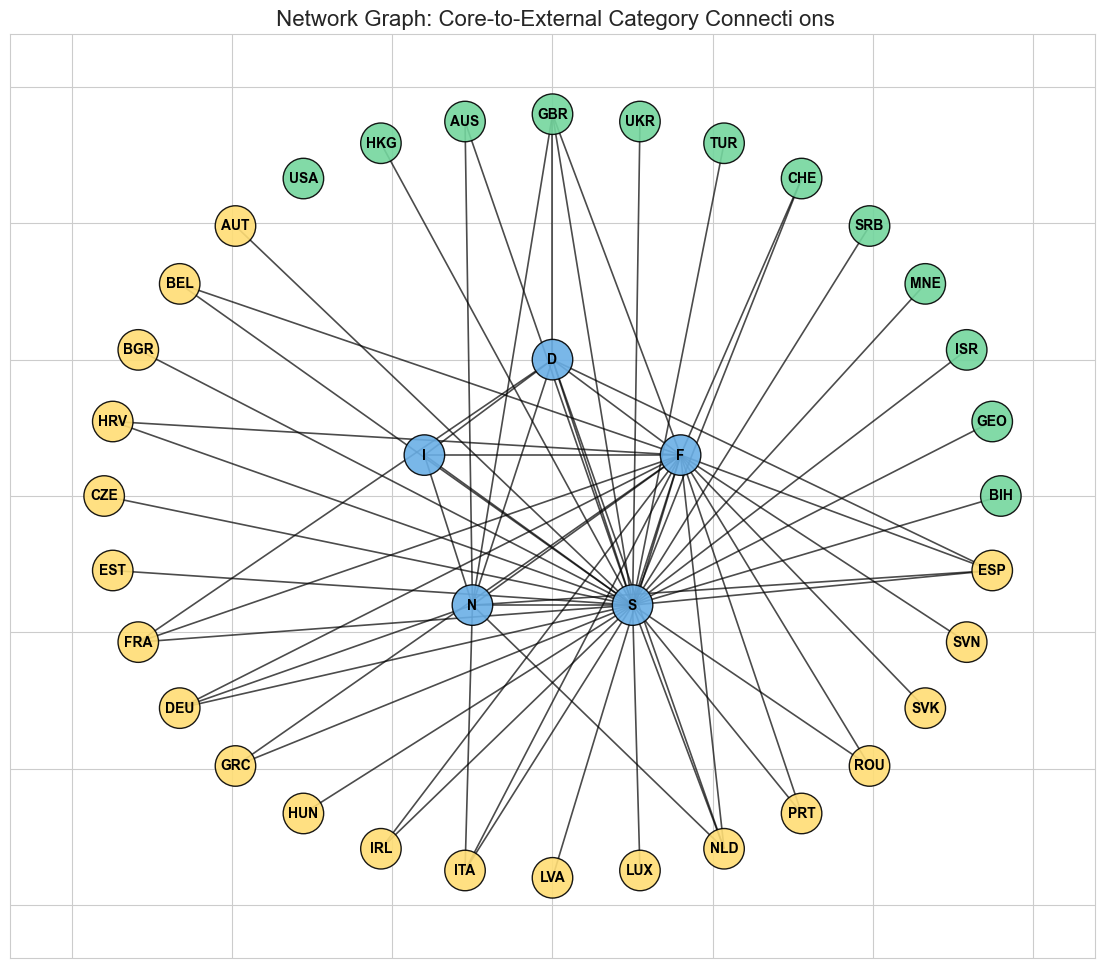

In [39]:
# Create the network graph
G = nx.Graph()
G.add_nodes_from(blue_nodes + green_nodes + yellow_nodes)
G.add_edges_from(edges)

# Positioning Nodes
pos = nx.circular_layout(G.subgraph(green_nodes + yellow_nodes), center=(0, 0), scale=1.4)  # Make it larger

# Custom pentagram structure for core nodes
pentagram_pos = {
    "D": np.array([0, 0.5]),
    "F": np.array([0.40, 0.15]),
    "I": np.array([-0.40, 0.15]),
    "N": np.array([-0.25, -0.4]),
    "S": np.array([0.25, -0.4])
}
pos.update(pentagram_pos)

# Define **pastel** node colors
color_map = {
    "blue": "#6AAFE6",   # Core Nodes (Lighter pastel blue)
    "green": "#74D69E",  # External Green Nodes (Lighter pastel green)
    "yellow": "#FFDD75"  # External Yellow Nodes (Lighter pastel yellow)
}

# Assign colors to each node
node_colors = [color_map["blue"] if node in blue_nodes else
               color_map["green"] if node in green_nodes else
               color_map["yellow"] for node in G.nodes()]

# Plot the network graph
plt.figure(figsize=(14, 12))  # Increase figure size for better visibility
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=850, edgecolors="black", alpha=0.9)
nx.draw_networkx_edges(G, pos, width=1.2, alpha=0.7, edge_color="black")
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black", font_weight="bold")

# Save network graph as image
network_graph_path = "network_graph.png"
plt.savefig(network_graph_path, dpi=300, bbox_inches="tight")

# Display
plt.title(" Network Graph: Core-to-External Category Connecti ons", fontsize=16)
plt.show()


<h1> Collated Graphs

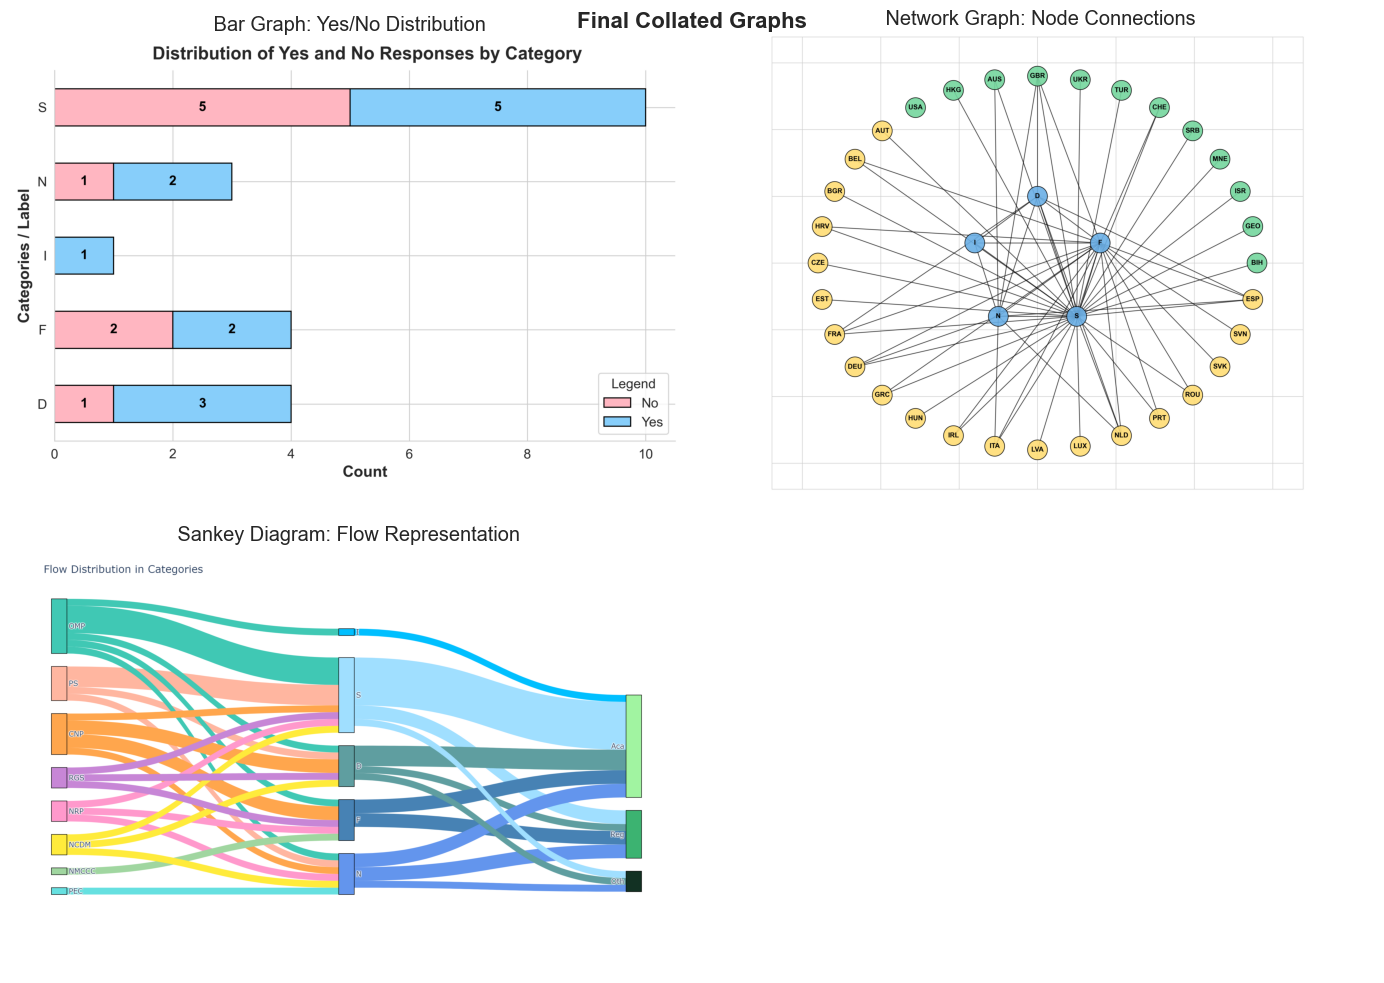

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load saved images
bar_graph_img = mpimg.imread("bar_graph.png")
sankey_img = mpimg.imread("sankey_diagram.png")
network_img = mpimg.imread("network_graph.png")

# Create final figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Bar Graph
axes[0, 0].imshow(bar_graph_img)
axes[0, 0].axis('off')
axes[0, 0].set_title(" Bar Graph: Yes/No Distribution")

# Sankey Diagram
axes[1, 0].imshow(sankey_img)
axes[1, 0].axis('off')
axes[1, 0].set_title(" Sankey Diagram: Flow Representation")

# Network Graph
axes[0, 1].imshow(network_img)
axes[0, 1].axis('off')
axes[0, 1].set_title(" Network Graph: Node Connections")

# Hide empty subplot
axes[1, 1].axis('off')

plt.tight_layout()
plt.suptitle("Final Collated Graphs", fontsize=16, fontweight='bold')

# Save final image
plt.savefig("collated_graphs.png", dpi=300, bbox_inches='tight')
plt.show()
